<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from yellowbrick.model_selection import FeatureImportances

<h1><center>Processed Dataset from previous Notebook</center></h1>

In [2]:
plasma = pd.read_csv('dataset/plasma(Specific Metabolics)_final.csv')
serum = pd.read_csv('dataset/serum(Specific Metabolics)_final.csv')
plasma.head()
plasma = plasma.drop('Unnamed: 0', axis=1)
serum = serum.drop('Unnamed: 0', axis=1)

In [3]:
plasma

,asparagine,benzoic acid,tryptophan,uric acid,alpha-ketoglutarate,citrulline,glutamine,malic acid,methionine sulfoxide,3-phosphoglycerate,...,aspartic acid,lactic acid,maltose,maltotriose,phenol,phosphoethanolamine,pyrophosphate,pyruvic acid,taurine,Class
0,-0.38,-1.31,0.52,-1.02,0.51,-0.33,-0.19,0.76,0.19,-0.49,...,0.02,-0.04,-0.34,-1.21,-0.10,0.03,-0.27,1.38,0.41,disease
1,0.95,-0.46,-0.90,-1.24,-0.39,0.69,1.04,0.09,-0.47,0.92,...,0.40,0.15,-0.29,-0.13,0.22,-0.83,-0.41,0.29,-0.16,disease
2,0.69,-0.49,0.83,-0.23,0.35,-0.56,0.36,0.06,-0.71,0.19,...,0.18,1.06,0.24,0.68,0.98,0.02,0.95,-0.19,0.83,disease
3,0.35,1.68,-1.11,-0.48,-0.75,-0.99,1.15,-0.41,-0.65,0.33,...,-0.35,0.53,-0.19,-0.38,0.69,-0.19,-0.59,-0.66,1.25,disease
4,0.30,-1.20,0.01,0.76,-0.14,0.77,-0.31,0.76,0.12,0.60,...,0.01,-0.33,-0.01,1.43,-0.27,0.32,0.52,-0.09,0.08,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.77,-0.63,0.98,0.05,-0.30,0.08,1.06,-0.97,0.33,-0.89,...,-0.82,-0.72,-0.35,-0.38,-0.68,-0.45,-0.96,-0.12,-0.37,control
78,-0.43,-1.06,-0.03,1.56,-0.64,-0.41,-0.13,-0.67,-0.37,0.36,...,-0.73,0.64,-0.19,-0.60,0.79,-0.42,-0.22,-0.51,-0.23,control
79,-0.10,1.50,0.94,0.30,0.78,0.91,1.47,1.22,0.38,-0.47,...,-0.52,-0.53,-0.35,0.05,-0.44,-0.24,-0.67,-0.36,-0.54,control
80,-1.22,0.90,-1.34,-0.01,-0.14,-1.17,-1.39,-0.09,0.38,-0.78,...,-0.67,-0.46,-0.50,-0.83,-0.18,-0.44,-0.92,-0.10,-1.05,control


<h>Keep labels as an numpy array.</h>

In [4]:
labels = np.reshape(plasma.Class.to_numpy(), (82,1))
targets = plasma.iloc[:, -1].unique()

<h1><center>Models</center></h1>

In [5]:
# !pip install lazypredict

In [6]:
def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

In [7]:
full_result = []
accuracy = []
for k in [0]:
    if k==0:
        name = ['Plasma(Specific Metabolics)']
        dfs = [plasma]
    
    random_state = 42

    for idx, data in enumerate(dfs):
      result = []
      X, y = get_xy(data)
      rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)
      raw_x = X
      for train_index, test_index in rs.split(X):
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        result.append(models)
      acc = []
      for i in range(1):
        acc.append(result[i].iloc[0]['Balanced Accuracy'])

#       print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
#       accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])
        
      full_result.append(result)
          

100%|██████████████████████████████████████████| 29/29 [00:02<00:00, 11.07it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 23.26it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.42it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 24.00it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 482
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 26.24it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.59it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 24.53it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 21.74it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.28it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.07it/s]

[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 481
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [8]:
# full_result

In [9]:
# full_result[0][0]


In [10]:
model_names = full_result[0][0].index
# model_names

In [11]:
model_topper = {}
for i in model_names:
    vars()[i] = [0, 0.0]
    model_topper[i] = vars()[i]
for i in range(1):
    for j in range(len(model_names)):
        if full_result[0][i].index[0] == model_names[j]:
            vars()[model_names[j]][0] += 1
        vars()[model_names[j]][1] += full_result[0][i].loc[model_names[j]]['Balanced Accuracy']
        model_topper[model_names[j]] = vars()[model_names[j]]

model_topper

{'RidgeClassifierCV': [1, 0.9090909090909092],
 'RidgeClassifier': [0, 0.9090909090909092],
 'RandomForestClassifier': [0, 0.8712121212121212],
 'LogisticRegression': [0, 0.8712121212121212],
 'NuSVC': [0, 0.8636363636363636],
 'SVC': [0, 0.8636363636363636],
 'LinearDiscriminantAnalysis': [0, 0.8636363636363636],
 'CalibratedClassifierCV': [0, 0.8257575757575758],
 'ExtraTreesClassifier': [0, 0.8257575757575758],
 'NearestCentroid': [0, 0.8181818181818181],
 'LGBMClassifier': [0, 0.7878787878787878],
 'XGBClassifier': [0, 0.7878787878787878],
 'Perceptron': [0, 0.7878787878787878],
 'PassiveAggressiveClassifier': [0, 0.7878787878787878],
 'BaggingClassifier': [0, 0.7878787878787878],
 'KNeighborsClassifier': [0, 0.7727272727272727],
 'LinearSVC': [0, 0.7424242424242424],
 'BernoulliNB': [0, 0.7424242424242424],
 'LabelSpreading': [0, 0.7348484848484849],
 'LabelPropagation': [0, 0.7348484848484849],
 'GaussianNB': [0, 0.7348484848484849],
 'AdaBoostClassifier': [0, 0.7045454545454546]

In [12]:

full_result[0][0].iloc[0]['Balanced Accuracy']


0.9090909090909092

In [13]:
# full_result = []
accuracy = []
for k in [0]:
    if k==0:
        name = ['Plasma(Specific Metabolics)', 'Serum(Specific Metabolics)']
        dfs = [plasma, serum]
    
    random_state = 42

    for idx, data in enumerate(dfs):
      result = []
      X, y = get_xy(data)
      rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state) # k fold use hoice
      raw_x = X
      for train_index, test_index in rs.split(X):
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        result.append(models)
      acc = []
      for i in range(1):
            for j in range(len(model_names)):
                if result[i].index[j] == 'RidgeClassifier':
                    acc.append(result[i].loc['RidgeClassifier']['Balanced Accuracy'])
#                     print(result[i].index[j], result[i].iloc[j]['Balanced Accuracy'])

      print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
      accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])
        
#       full_result.append([name[idx], result])


100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.63it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.29it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.32it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.22it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 482
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 26.23it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.64it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.20it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 24.90it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.32it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 476
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.72it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 481
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 24.57it/s]


[LightGBM] [Info] Number of positive: 30, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461538 -> initscore=-0.154151
[LightGBM] [Info] Start training from score -0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.97it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.97it/s]


[LightGBM] [Info] Number of positive: 28, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430769 -> initscore=-0.278713
[LightGBM] [Info] Start training from score -0.278713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.56it/s]


[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 25.78it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 26.92it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 26.66it/s]


[LightGBM] [Info] Number of positive: 32, number of negative: 33
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492308 -> initscore=-0.030772
[LightGBM] [Info] Start training from score -0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 26.88it/s]


[LightGBM] [Info] Number of positive: 36, number of negative: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553846 -> initscore=0.216223
[LightGBM] [Info] Start training from score 0.216223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 27.02it/s]


[LightGBM] [Info] Number of positive: 35, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538462 -> initscore=0.154151
[LightGBM] [Info] Start training from score 0.154151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████████████████████████████████████| 29/29 [00:01<00:00, 26.31it/s]

[LightGBM] [Info] Number of positive: 33, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 65, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507692 -> initscore=0.030772
[LightGBM] [Info] Start training from score 0.030772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [14]:
accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])
accuracy_df

,Processed Dataset,Accuracy
0,Plasma(Specific Metabolics),0.9090909090909092
1,Serum(Specific Metabolics),0.7348484848484849


In [15]:
accuracy_df.to_csv('dataset/accuracy_Specific Metabolics_final.csv', index=False)


<h1><center>Visualization</center></h1>

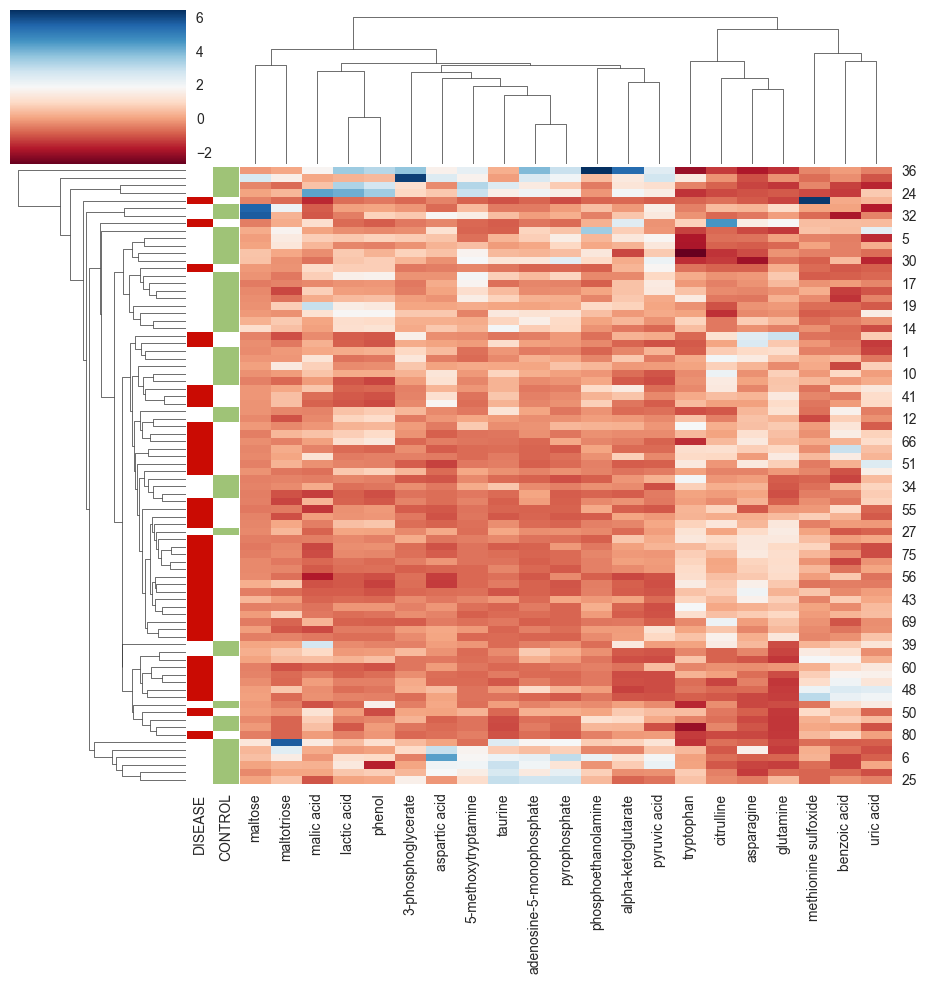

In [16]:
# Data set
final_df1 = plasma.copy()
Class = plasma.pop("Class")
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(plasma, cmap='RdBu', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
# Show the graph
plt.savefig('dataset/plotting/clustermap_plasma_final.JPG')
plt.show()

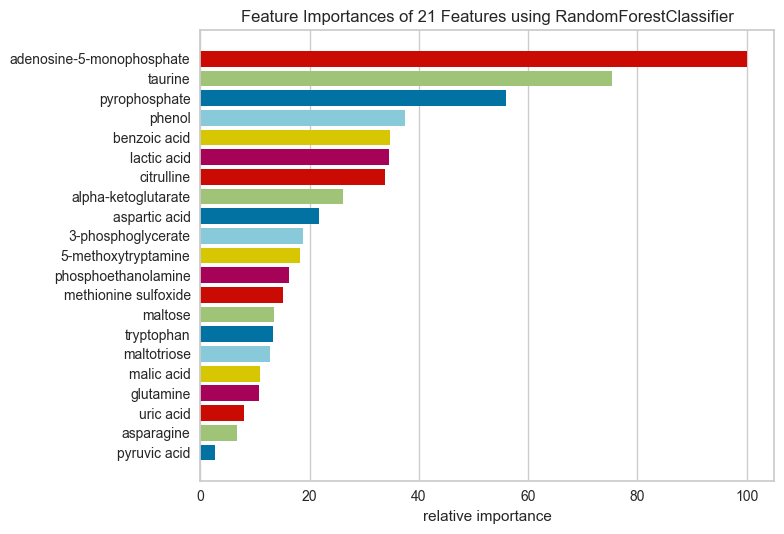

<Axes: title={'center': 'Feature Importances of 21 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [18]:
# Load the classification data set
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
X = final_df1.iloc[:, :-1]
y = final_df1['Class'].copy()
y = y.map({"control": 1, "disease": 0})

model = RandomForestClassifier(n_estimators=17)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

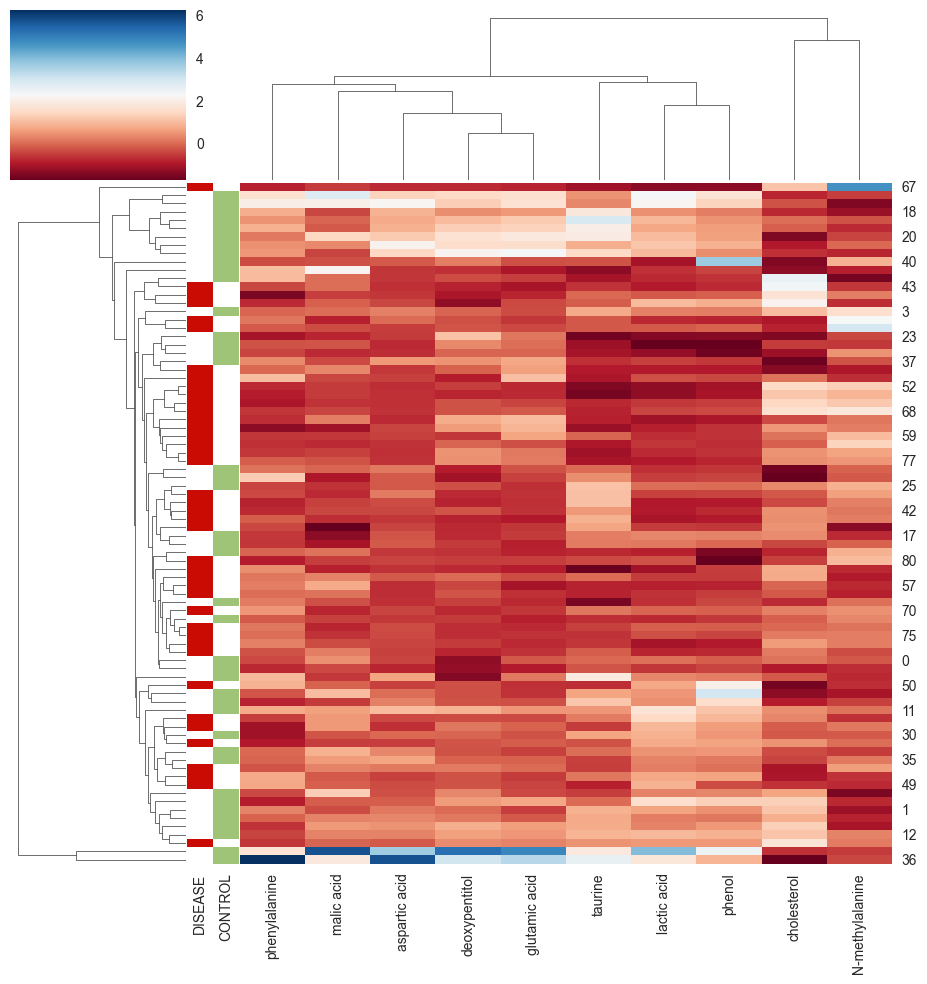

In [20]:
# Data set
final_df2 = serum.iloc[:, :-1]
Class = y
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(final_df2, cmap='RdBu', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
# Show the graph
plt.savefig('dataset/plotting/clustermap_serum_final.JPG')
plt.show()

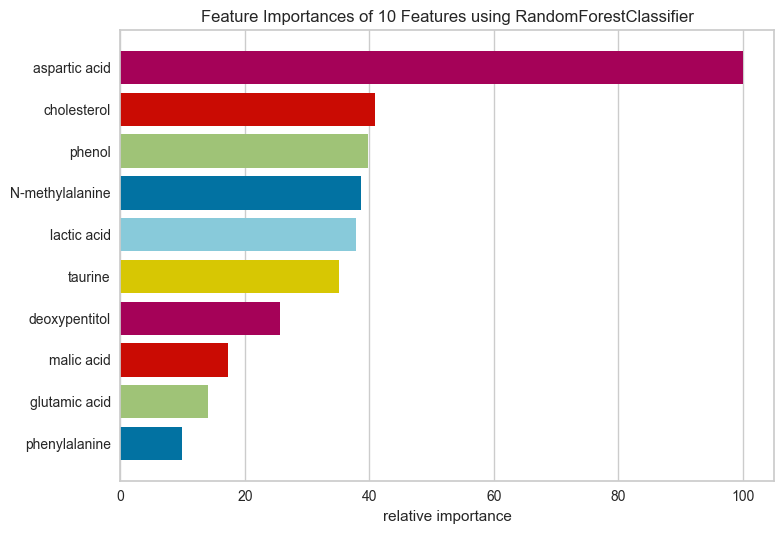

<Axes: title={'center': 'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [21]:
# Load the classification data set
X = final_df2
y = Class
model = RandomForestClassifier(n_estimators=17)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()